## Segmenting and Clustering Neighborhoods. Part 3

* Using the Notebook to build the code to scrape the following Wikipedia page 
* Using BeautifulSoup package with to transform the data in the table on the Wikipedia page
* Geting the latitude and the longitude coordinates of each neighborhood
* Seting up the map

In [6]:
# install wikipedia modul
! pip install wikipedia

In [7]:
# install shapely modul
! pip install shapely

     |████████████████████████████████| 1.5MB 12.0MB/s eta 0:00:01


In [9]:
# install geopandas modul
! pip install geopandas

     |████████████████████████████████| 921kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 25.6MB/s eta 0:00:01
     |████████████████████████████████| 11.9MB 40.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


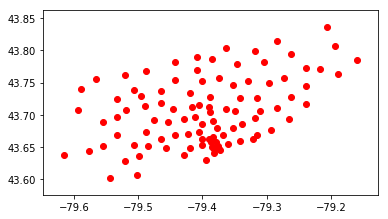

In [10]:
# import libraries
%matplotlib inline
import requests
import io
import wikipedia as wp
import pandas as pd 
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

#Code from part 1

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df = df[df.Borough != 'Not assigned']
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
        
#Code from part 2

# geting the latitude and the longitude coordinates of each neighborhood.
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# rename the first column to allow merging dataframes on postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

#Code for part 3

# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()